# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
import datetime


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Set up link for api call
url = "http://api.openweathermap.org/data/2.5/weather?"
#link = f"{link}appid={weather_api_key}&units=metric&q="
#Set up lists to hold data
location = []
clouds = []
country = []
date = []
humidity = []
lats = []
lngs = []
max_temp = []
wind = []

units = "metric"
#set organisational variables
count = 0
current_set = 1
#collect data and store in lists
print("Beginning Data Retrieval\n-----------------------------")
for city in cities:
    try:
        link = f"{url}appid={weather_api_key}&q={city}&units={units}"
        data = requests.get(link).json()
        location.append(data["name"])
        clouds.append(data["clouds"]["all"])
        country.append(data["sys"]["country"])
        date.append(datetime.date.fromtimestamp(data["dt"]))
        humidity.append(data["main"]["humidity"])
        lats.append(data["coord"]["lat"])
        lngs.append(data["coord"]["lon"])
        max_temp.append(data["main"]["temp_max"])
        wind.append(data["wind"]["speed"])
        #print(city)
        if count > 49:
            count = 1
            current_set += 1
        else:
            count += 1
        print(f"Processing record {count} of set {current_set} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-----------------------------
Processing record 1 of set 1 | melfi
Processing record 2 of set 1 | jamestown
Processing record 3 of set 1 | punta arenas
Processing record 4 of set 1 | esperance
Processing record 5 of set 1 | ushuaia
Processing record 6 of set 1 | barrow
Processing record 7 of set 1 | wichita falls
Processing record 8 of set 1 | kruisfontein
Processing record 9 of set 1 | kapaa
Processing record 10 of set 1 | avarua
City not found. Skipping...
Processing record 11 of set 1 | aurora
Processing record 12 of set 1 | klaksvik
Processing record 13 of set 1 | port alfred
Processing record 14 of set 1 | takoradi
Processing record 15 of set 1 | hobart
Processing record 16 of set 1 | lawton
Processing record 17 of set 1 | fairbanks
City not found. Skipping...
Processing record 18 of set 1 | east london
Processing record 19 of set 1 | talnakh
Processing record 20 of set 1 | perth
City not found. Skipping...
Processing record 21 of set 1 | hobyo
Processing 

Processing record 35 of set 4 | yeppoon
Processing record 36 of set 4 | mae sai
City not found. Skipping...
Processing record 37 of set 4 | nyurba
Processing record 38 of set 4 | montrose
Processing record 39 of set 4 | ambilobe
Processing record 40 of set 4 | namibe
Processing record 41 of set 4 | sao gabriel da cachoeira
Processing record 42 of set 4 | nishihara
Processing record 43 of set 4 | manama
Processing record 44 of set 4 | saint-denis
Processing record 45 of set 4 | rawicz
Processing record 46 of set 4 | camacupa
Processing record 47 of set 4 | kavieng
Processing record 48 of set 4 | haimen
Processing record 49 of set 4 | leningradskaya
Processing record 50 of set 4 | palmer
Processing record 1 of set 5 | faya
Processing record 2 of set 5 | ahipara
Processing record 3 of set 5 | sorong
Processing record 4 of set 5 | kannur
Processing record 5 of set 5 | brejo
Processing record 6 of set 5 | ouadda
Processing record 7 of set 5 | shingu
Processing record 8 of set 5 | san patric

Processing record 27 of set 8 | linxia
Processing record 28 of set 8 | malinovskiy
Processing record 29 of set 8 | belle glade
Processing record 30 of set 8 | bubaque
Processing record 31 of set 8 | pasighat
Processing record 32 of set 8 | gold coast
Processing record 33 of set 8 | izazi
Processing record 34 of set 8 | nouadhibou
Processing record 35 of set 8 | bali
Processing record 36 of set 8 | college
Processing record 37 of set 8 | thinadhoo
Processing record 38 of set 8 | gaogou
Processing record 39 of set 8 | murdochville
Processing record 40 of set 8 | caboolture
City not found. Skipping...
Processing record 41 of set 8 | zhezkazgan
Processing record 42 of set 8 | brae
Processing record 43 of set 8 | lerwick
Processing record 44 of set 8 | krasnyy oktyabr
Processing record 45 of set 8 | atambua
Processing record 46 of set 8 | esil
Processing record 47 of set 8 | muriti
City not found. Skipping...
Processing record 48 of set 8 | nizhniy tsasuchey
Processing record 49 of set 8 | 

Processing record 16 of set 12 | javornik
Processing record 17 of set 12 | maumere
Processing record 18 of set 12 | nuuk
Processing record 19 of set 12 | crnomelj
Processing record 20 of set 12 | san lawrenz
Processing record 21 of set 12 | santa maria
Processing record 22 of set 12 | mugur-aksy
Processing record 23 of set 12 | chapada dos guimaraes
Processing record 24 of set 12 | axim
Processing record 25 of set 12 | lamar
Processing record 26 of set 12 | kuchera
Processing record 27 of set 12 | sokoto
Processing record 28 of set 12 | krasnaya polyana
Processing record 29 of set 12 | zaraza
Processing record 30 of set 12 | elesbao veloso
Processing record 31 of set 12 | malinovoye ozero
Processing record 32 of set 12 | temerloh
Processing record 33 of set 12 | lira
Processing record 34 of set 12 | san andres
Processing record 35 of set 12 | pudozh
Processing record 36 of set 12 | hay river
Processing record 37 of set 12 | deputatskiy
Processing record 38 of set 12 | mgandu
----------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
#dictonary

df = {
    "City" : location,
    "CLoundiness" : clouds,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Latitude" : lats,
    "Longitude": lngs,
    "Max Temperature": max_temp,
    "Wind Speed": wind
}


df = pd.DataFrame(df)
df.count()

City               588
CLoundiness        588
Country            588
Date               588
Humidity           588
Latitude           588
Longitude          588
Max Temperature    588
Wind Speed         588
dtype: int64

In [29]:
df.head()

,City,CLoundiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Melfi,100,IT,2021-04-16,89,40.9965,15.6514,3.33,1.10
1,Jamestown,90,US,2021-04-16,93,42.0970,-79.2353,3.33,5.14
2,Punta Arenas,0,CL,2021-04-16,71,-53.1500,-70.9167,9.00,8.75
3,Esperance,55,AU,2021-04-16,56,-33.8667,121.9000,20.00,3.60
4,Ushuaia,90,AR,2021-04-16,75,-54.8000,-68.3000,6.00,2.06


In [28]:
df.to_csv("../output_data/weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [86]:
impossible = 0
k = 100
for humidities in humidity :
    
    impossible = impossible + (humidities > k)
    #print(humidities)

print(impossible)

0


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

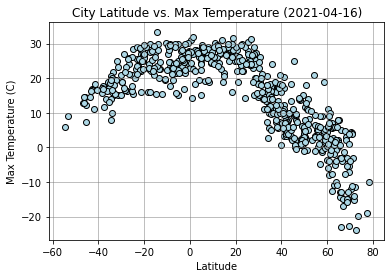

In [70]:
#y is max temp
#x is latitude
#title is "City Latitude vs. Max Temperature {date}"
plt.scatter(lats, max_temp, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({date[1]})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(color='gray', linestyle='-', linewidth=.5)

## Latitude vs. Humidity Plot

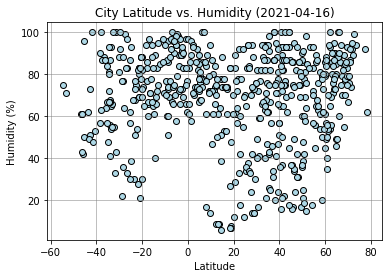

In [69]:
plt.scatter(lats, humidity, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({date[1]})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(color='gray', linestyle='-', linewidth=.5)

## Latitude vs. Cloudiness Plot

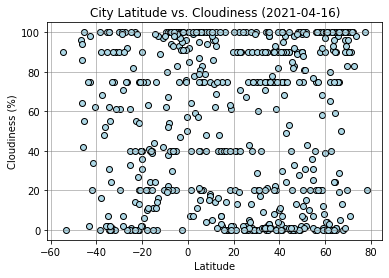

In [72]:
plt.scatter(lats, clouds, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({date[1]})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(color='gray', linestyle='-', linewidth=.5)

## Latitude vs. Wind Speed Plot

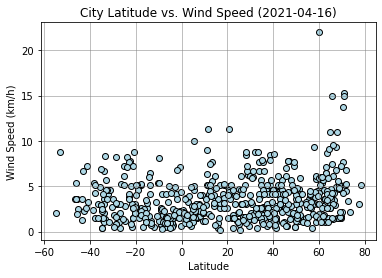

In [73]:
plt.scatter(lats, wind, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed ({date[1]})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.grid(color='gray', linestyle='-', linewidth=.5)

## Linear Regression

In [105]:
north = []
north_temp = []
north_hum = []
north_cloud=[]
north_wind = []
south = []
south_temp = []
south_hum = []
south_cloud = []
south_wind = []

temp_index = 0

for lati in lats :
    #print(lats)
    if lati > 0 :
        north.append(lati)
        north_temp.append(max_temp[temp_index])
        north_hum.append(humidity[temp_index])
        north_cloud.append(clouds[temp_index])
        north_wind.append(wind[temp_index])
        
    elif lati < 0 :
        south.append(lati)
        south_temp.append(max_temp[temp_index])
        south_hum.append(humidity[temp_index])
        south_cloud.append(clouds[temp_index])
        south_wind.append(wind[temp_index])
    temp_index +=1
#print(north)
#print(south)
#print(north_temp)
#print(south_temp)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation between these two variables is -0.88


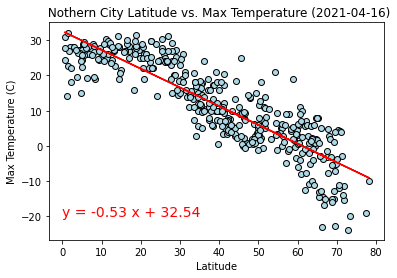

In [104]:
plt.scatter(north, north_temp, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(f" Nothern City Latitude vs. Max Temperature ({date[1]})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

(slope, intercept,rvalue, pvalue, stderr)= linregress(north,north_temp)
#converting north into special array for element wise operation
north = np.array(north)
regress_values = north*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(north, regress_values , color = 'red')

plt.annotate(line_eq,(0,-20), color='red', fontsize=14)
print(f"Correlation between these two variables is {round(rvalue,2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation between these two variables is 0.66


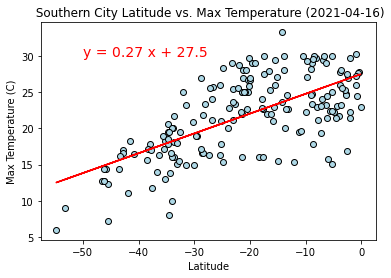

In [114]:
plt.scatter(south, south_temp, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(f" Southern City Latitude vs. Max Temperature ({date[1]})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

(slope, intercept,rvalue, pvalue, stderr)= linregress(south,south_temp)
#converting north into special array for element wise operation
south = np.array(south)
regress_values = south*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(south, regress_values , color = 'red')

plt.annotate(line_eq,(-50,30), color='red', fontsize=14)
print(f"Correlation between these two variables is {round(rvalue,2)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation between these two variables is 0.12


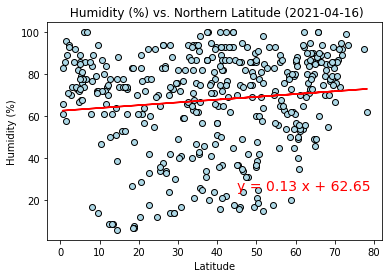

In [119]:
#made a template for ease
xvar = north
yvar = north_hum
title = f" Humidity (%) vs. Northern Latitude ({date[1]})"
xlab = "Latitude"
ylab = "Humidity (%)"
xlo = 45
ylo = 25

plt.scatter(xvar, yvar, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(title)
plt.xlabel(xlab)
plt.ylabel(ylab)

(slope, intercept,rvalue, pvalue, stderr)= linregress(xvar,yvar)
#converting north into special array for element wise operation
xvar = np.array(xvar)
regress_values = xvar*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(xvar, regress_values , color = 'red')

plt.annotate(line_eq,(xlo,ylo), color='red', fontsize=14)
print(f"Correlation between these two variables is {round(rvalue,2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation between these two variables is 0.31


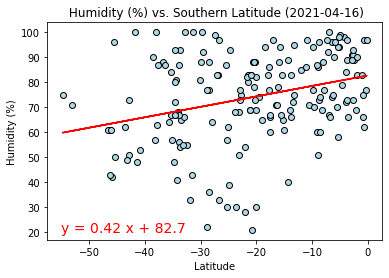

In [124]:
xvar = south
yvar = south_hum
title = f" Humidity (%) vs. Southern Latitude ({date[1]})"
xlab = "Latitude"
ylab = "Humidity (%)"
xlo = -55
ylo = 20

plt.scatter(xvar, yvar, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(title)
plt.xlabel(xlab)
plt.ylabel(ylab)

(slope, intercept,rvalue, pvalue, stderr)= linregress(xvar,yvar)
#converting north into special array for element wise operation
xvar = np.array(xvar)
regress_values = xvar*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(xvar, regress_values , color = 'red')

plt.annotate(line_eq,(xlo,ylo), color='red', fontsize=14)
print(f"Correlation between these two variables is {round(rvalue,2)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation between these two variables is 0.06


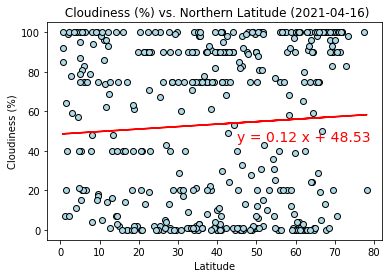

In [126]:
xvar = north
yvar = north_cloud
title = f" Cloudiness (%) vs. Northern Latitude ({date[1]})"
xlab = "Latitude"
ylab = "Cloudiness (%)"
xlo = 45
ylo = 45

plt.scatter(xvar, yvar, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(title)
plt.xlabel(xlab)
plt.ylabel(ylab)

(slope, intercept,rvalue, pvalue, stderr)= linregress(xvar,yvar)
#converting north into special array for element wise operation
xvar = np.array(xvar)
regress_values = xvar*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(xvar, regress_values , color = 'red')

plt.annotate(line_eq,(xlo,ylo), color='red', fontsize=14)
print(f"Correlation between these two variables is {round(rvalue,2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation between these two variables is 0.21


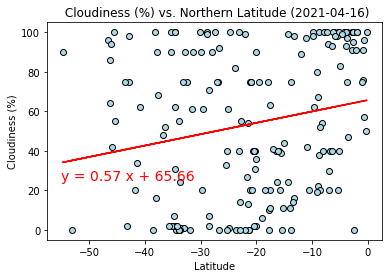

In [128]:
xvar = south
yvar = south_cloud
title = f" Cloudiness (%) vs. Northern Latitude ({date[1]})"
xlab = "Latitude"
ylab = "Cloudiness (%)"
xlo = -55
ylo = 25

plt.scatter(xvar, yvar, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(title)
plt.xlabel(xlab)
plt.ylabel(ylab)

(slope, intercept,rvalue, pvalue, stderr)= linregress(xvar,yvar)
#converting north into special array for element wise operation
xvar = np.array(xvar)
regress_values = xvar*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(xvar, regress_values , color = 'red')

plt.annotate(line_eq,(xlo,ylo), color='red', fontsize=14)
print(f"Correlation between these two variables is {round(rvalue,2)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation between these two variables is 0.2


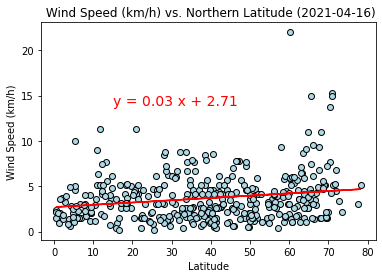

In [131]:
xvar = north
yvar = north_wind
title = f" Wind Speed (km/h) vs. Northern Latitude ({date[1]})"
xlab = "Latitude"
ylab = "Wind Speed (km/h)"
xlo = 15
ylo = 14

plt.scatter(xvar, yvar, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(title)
plt.xlabel(xlab)
plt.ylabel(ylab)

(slope, intercept,rvalue, pvalue, stderr)= linregress(xvar,yvar)
#converting north into special array for element wise operation
xvar = np.array(xvar)
regress_values = xvar*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(xvar, regress_values , color = 'red')

plt.annotate(line_eq,(xlo,ylo), color='red', fontsize=14)
print(f"Correlation between these two variables is {round(rvalue,2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation between these two variables is -0.22


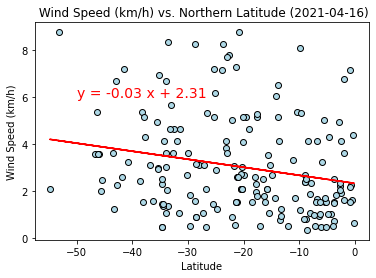

In [133]:
xvar = south
yvar = south_wind
title = f" Wind Speed (km/h) vs. Northern Latitude ({date[1]})"
xlab = "Latitude"
ylab = "Wind Speed (km/h)"
xlo = -50
ylo = 6

plt.scatter(xvar, yvar, marker = "o", facecolors = "lightblue", edgecolors="black")
plt.title(title)
plt.xlabel(xlab)
plt.ylabel(ylab)

(slope, intercept,rvalue, pvalue, stderr)= linregress(xvar,yvar)
#converting north into special array for element wise operation
xvar = np.array(xvar)
regress_values = xvar*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(xvar, regress_values , color = 'red')

plt.annotate(line_eq,(xlo,ylo), color='red', fontsize=14)
print(f"Correlation between these two variables is {round(rvalue,2)}")